# Linear Algebra in Python

*This is part of a tutorial from the University of British Columbia*
<a href="https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/applications/"> Linear Algebra</a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Polynomial Interpolation

Polynomial interpolation finds the unique polynomial of degree $n$ which passes through $n+1$ points in the $xy$-plane.

Suppose we have $n + 1$ points in the $xy$-plane

$$ (x_0,y_0),(x_1,y_1),\dots,(x_n,y_n) $$

such that all the $x$ values are distinct ($x_i \not= x_j$ for $i \not= j$). The general form of a degree $n$ polynomial is

$$ p(x) = a_0 + a_1 x + a_2x^2 + \cdots + a_n x^n $$

If $p(x)$ is the unique degree $n$ polynomial which interpolates all the points, then the coefficients $a_0$, $a_1$, $\dots$, $a_n$ satisfy the following equations:

\begin{align} a_0 + a_1x_0 + a_2x_0^2 + \cdots + a_n x_0^n &= y_0 \\ a_0 + a_1x_1 + a_2x_1^2 + \cdots + a_n x_1^n &= y_1 \\ & \ \ \vdots \\ a_0 + a_1x_n + a_2x_n^2 + \cdots + a_n x_n^n &= y_n \end{align}

Therefore the vector of coefficients

$$ \mathbf{a} = \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_n \end{bmatrix} $$

is the unique the solution of the linear system of equations

$$ X \mathbf{a}=\mathbf{y} $$

where $X$ is the Vandermonde matrix and $\mathbf{y}$ is the vector of $y$ values

$$ X = \begin{bmatrix} 1 & x_0 & x_0^2 & \dots & x_0^n \\ 1 & x_1 & x_1^2 & \dots & x_1^n \\ & \vdots & & & \vdots \\ 1 & x_n & x_n^2 & \dots & x_n^n \\ \end{bmatrix} \ \ \mathrm{and} \ \ \mathbf{y} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} $$

## **Simple Parabola**

$y=x^2$ is the unique degree 2 polynomial that interpolates the points $(-1,1)$, $(0,0)$ and $(1,1)$. 

Let's compute the polynomial interpolation of these points and verify the expected result $a_0=0$, $a_1=0$ and $a_2=1$

In [22]:
# Create the Vandermonde matrix
x = np.array([-1,0,1])
X_ = np.column_stack([[1,1,1],x,x**2])
print(X_)

[[ 1 -1  1]
 [ 1  0  0]
 [ 1  1  1]]


In [23]:
y = np.array([1,0,1])
print(y,'\n')

# 3 rows,1 column 
y_reshape = np.array([1,0,1]).reshape(3,1) 
print(y_reshape)

# la solve for la problem
la = la.solve(X_, y_reshape)
la

[1 0 1] 

[[1]
 [0]
 [1]]


array([[0.],
       [0.],
       [1.]])

another Vandermonde matrix

In [28]:
import scipy.linalg as la

x = np.array([0,3,8])
X_ = np.column_stack([[1,1,1],x,x**2])

y = np.array([6,1,2]).reshape(3,1)

s = la.solve(X_,y)

print(X_,'\n')
print(y,'\n')
print(s,'\n')

[[ 1  0  0]
 [ 1  3  9]
 [ 1  8 64]] 

[[6]
 [1]
 [2]] 

[[ 6.        ]
 [-2.36666667]
 [ 0.23333333]] 



## To the plot!

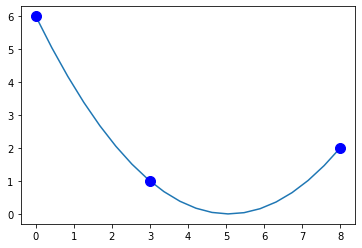

In [30]:
xs = np.linspace(0,8,20)
ys = s[0] + s[1]*xs + s[2]*xs**2
plt.plot(xs,ys,x,y,'b.',ms=20)
plt.show()

## Least Squares Linear Regression

arbitrary choice of $a_0$ and $a_1$. The factor Epsilon ($\epsilon$) represents some random noise which we model using the normal distribution.

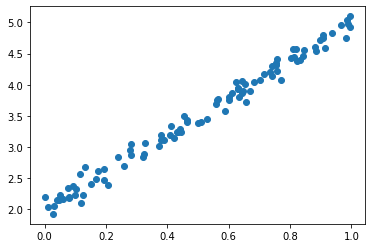

In [31]:
# fake data
a0 = 2
a1 = 3
N = 100
x = np.random.rand(100)
noise = 0.1*np.random.randn(100)
y = a0 + a1*x + noise
plt.scatter(x,y);
plt.show()

(100, 2) 

[[1.         0.5600407 ]
 [1.         0.45350713]
 [1.         0.75717065]
 [1.         0.88479577]
 [1.         0.56434259]] 

[2.00049501 2.98661545]


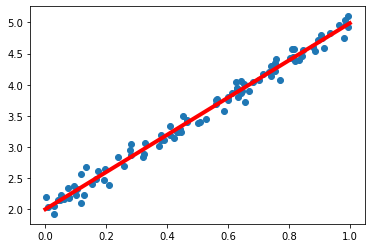

In [38]:
# use linear regression to retrieve the coefficients
X = np.column_stack([np.ones(N),x])
print(X.shape,'\n')

print(X[:5,:],'\n')

a = la.solve(X.T @ X, X.T @ y)
print(a)

# linear regression line
xs = np.linspace(0,1,10)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.show()

## Polynomial Regression

$$ (x_0,y_0), (x_1,y_1), \dots , (x_n,y_n) $$

We form the matrices as before but now the Vandermonde matrix $X$ has $d+1$ columns

$$ X = \begin{bmatrix} 1 & x_0 & x_0^2 & \cdots & x_0^d \\ 1 & x_1 & x_1^2 & \cdots & x_1^d \\ & \vdots & & & \vdots \\ 1 & x_n & x_n^2 & \cdots & x_n^d \end{bmatrix} \ , \ \ \mathbf{y} = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix} \ , \ \ \mathbf{a} = \begin{bmatrix} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_d \end{bmatrix} $$

The coefficients $\mathbf{a} = [a_0,a_1,a_2,\dots,a_d]^T$ which minimize the sum of squared errors $SSE$ is the unique solution of the linear system

$$ \left( X^T X \right) \mathbf{a} = \left( X^T \right) \mathbf{y} $$

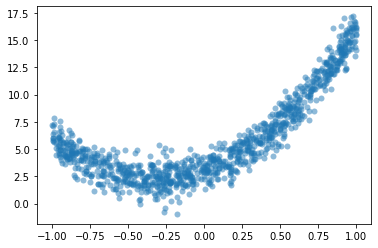

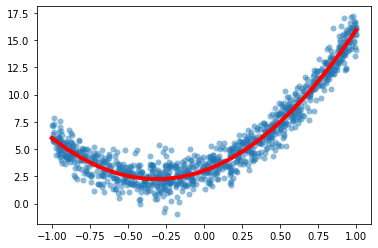

In [43]:
# fake data
a0 = 3
a1 = 5
a2 = 8
N = 1000
x = 2*np.random.rand(N) - 1 # Random numbers in the interval (-1,1)
noise = np.random.randn(N)
y = a0 + a1*x + a2*x**2 + noise
plt.scatter(x,y,alpha=0.5,lw=0);
plt.show()

# ---------------------
X = np.column_stack([np.ones(N),x,x**2])

a = la.solve((X.T @ X),X.T @ y)

xs = np.linspace(-1,1,20)
ys = a[0] + a[1]*xs + a[2]*xs**2
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y,alpha=0.5,lw=0)
plt.show()

# **Graph Theory**

A graph is a set of vertices and a set of edges connecting some of the vertices. We will consider simple, undirected, connected graphs:

- a graph is simple if there are no loops or multiple edges between vertices
- a graph is undirected if the edges do not have an orientation
- a graph is connected if each vertex is connected to every other vertex in the graph by a path

Python NetworkX library


The adjacency matrix $A_G$ of a graph $G$ with $n$ vertices is the square matrix of size $n$ such that $A_{i,j} = 1$ 

if vertices $i$ and $j$ are connected by an edge, and $A_{i,j} = 0$

In [44]:
import networkx as nx

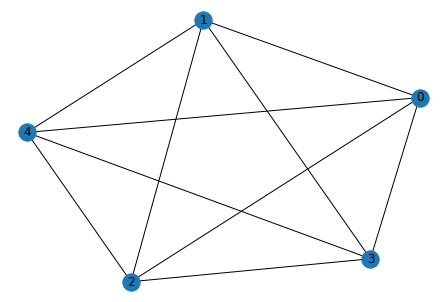

In [45]:
# plot the complete graph with 5 vertices and compute the adjacency matrix:
G = nx.complete_graph(5)
nx.draw(G,with_labels=True)

In [46]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


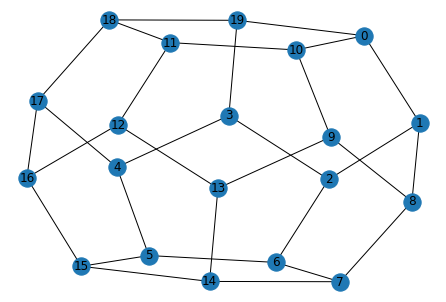

In [47]:
# shortest path , Plot the dodecahedral graph:
G = nx.dodecahedral_graph()
nx.draw(G,with_labels=True)

In [48]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


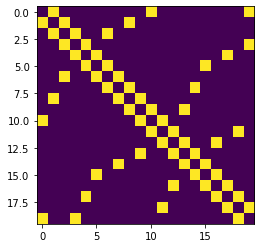

In [49]:
plt.imshow(A)
plt.show()

In [50]:
i = 0
j = 15
k = 1
Ak = A
while Ak[i,j] == 0:
    Ak = Ak @ A
    k = k + 1
print('Length of the shortest path is',k)

Length of the shortest path is 5


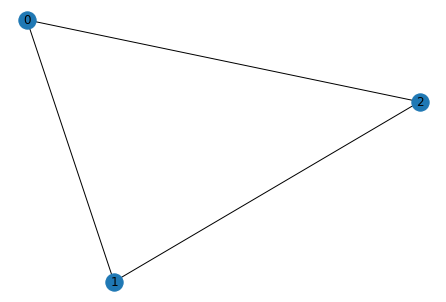

In [53]:
# Triangles in a graph
C3 = nx.complete_graph(3)
nx.draw(C3,with_labels=True)

In [57]:
# compute the number of triangles in the complete graph 7 vertices:
A3 = nx.adjacency_matrix(C3).todense()

eigvals, eigvecs = la.eig(A3)

triangles =int(np.round(np.sum(eigvals.real**3)/6,0))
print(f'Number of triangles in graph: {triangles}')

Number of triangles in graph: 1


Number of triangles in graph: 35


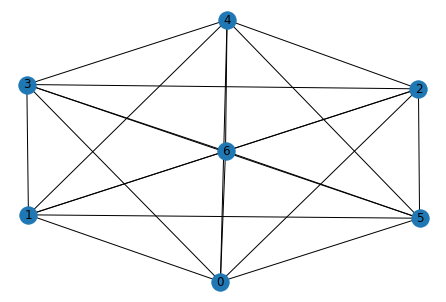

In [62]:
# compute the number of triangles in the complete graph 7 vertices:

# make a graph, 7 vertices
C7 = nx.complete_graph(7)

# draw graph
nx.draw(C7,with_labels=True)

A7 = nx.adjacency_matrix(C7).todense() # to make the graph less compressed

eigvals, eigvecs = la.eig(A7)


triangles = int(np.round(np.sum(eigvals.real**3)/6,0))
print(f'Number of triangles in graph: {triangles}')

In [69]:
def triangles(M):
    A = (M + M.T)/2
    eigvals, eigvecs = la.eig(A)
    eigvals = eigvals.real
    tri = int(np.round(np.sum(eigvals**3)/6,0))
    print(f'Number of triangles: {tri}\n')


 [[0 0 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0]]
Number of triangles: 80



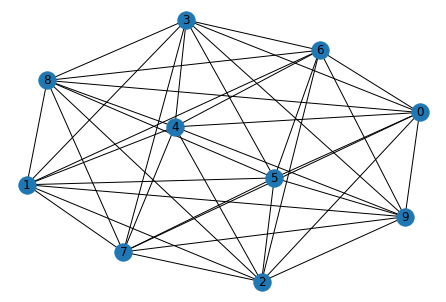

In [71]:
# Turan graph
G = nx.turan_graph(10,5)
nx.draw(G,with_labels=True)


A = nx.adjacency_matrix(G).todense()
print('\n',A)


triangles(A)

[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
Number of triangles: 0



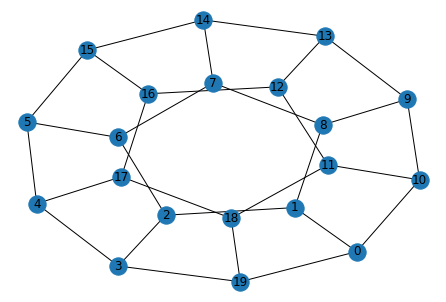

In [97]:
G = nx.dodecahedral_graph()
nx.draw(G,with_labels=True)


A = nx.adjacency_matrix(G).todense()
print(A)

t = triangles(A)
t


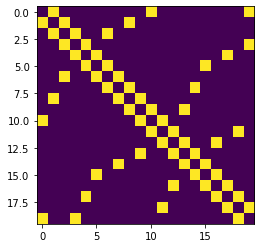

In [98]:
plt.imshow(A)
plt.show()

In [63]:
f = [9,21,12,15,32_400,29_800,3293,730]
np.mean(f)

8285.0